In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/norazhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load reviews dataset
health_df = pd.read_csv("healthcare_reviews.csv")
infra_df = pd.read_csv("infrastructure_reviews.csv")

# Quick checks
print("Health:", health_df.shape)
print("Infrastructure:", infra_df.shape)

Health: (70777, 20)
Infrastructure: (16734, 20)


In [3]:
# prepare the text
def preprocess_for_embedding(df):
    df = df.copy()
    df["text"] = (df["pros"].fillna("") + " " + df["cons"].fillna("")).str.lower()
    df["tokens"] = df["text"].apply(word_tokenize)
    return df

health_emb = preprocess_for_embedding(health_df)
infra_emb = preprocess_for_embedding(infra_df)

In [4]:
# train Word2Vec models
from gensim.models import Word2Vec

# Healthcare model
w2v_health = Word2Vec(
    sentences=health_emb["tokens"],
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=1  # skip-gram works better for semantic tasks
)

# Infrastructure model
w2v_infra = Word2Vec(
    sentences=infra_emb["tokens"],
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=1
)

/Users/norazhan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [5]:
# explore similarity
print("Healthcare:", w2v_health.wv.most_similar("job"))
print("Infrastructure:", w2v_infra.wv.most_similar("job"))

Healthcare: [('guards', 0.6320925951004028), ('role', 0.6306789517402649), ('position', 0.6195410490036011), ('jobs', 0.6117978096008301), ('employment', 0.5889773368835449), ('guard', 0.5748671293258667), ('exp', 0.5708845257759094), ('beginner', 0.5651225447654724), ('mindless', 0.5492129921913147), ('bi', 0.5490857362747192)]
Infrastructure: [('clearance', 0.6994143724441528), ('employment', 0.647480845451355), ('security', 0.6142597198486328), ('tenure', 0.609841525554657), ('contract', 0.5674710869789124), ('cv', 0.5655946731567383), ('near', 0.5591512322425842), ('micromanaged', 0.5575132369995117), ('niche', 0.5545524954795837), ('jobs', 0.55312180519104)]


In [6]:
print("Healthcare:", w2v_health.wv.most_similar("work"))
print("Infrastructure:", w2v_infra.wv.most_similar("work"))

Healthcare: [('wok', 0.7454590797424316), ('work/personal', 0.7377673983573914), ('work/home', 0.7370545268058777), ('relaxing', 0.7158852815628052), ('home/work', 0.7155357003211975), ('work-', 0.7080212831497192), ('autonomous', 0.6924744844436646), ('work/', 0.6879926323890686), ('life-work', 0.6828511357307434), ('work/family', 0.6757647395133972)]
Infrastructure: [('travelling', 0.6889247894287109), ('timing', 0.6846644282341003), ('collegues', 0.6769053339958191), ('scheduling', 0.6728068590164185), ('9/80', 0.6712765693664551), ('nights', 0.6662894487380981), ('fast-paced', 0.666074275970459), ('balanced', 0.664935827255249), ('enviroment', 0.6617209911346436), ('life/work', 0.6615427732467651)]


In [7]:
print("Healthcare:", w2v_health.wv.most_similar("management"))
print("Infrastructure:", w2v_infra.wv.most_similar("management"))

Healthcare: [('leadership', 0.8409343957901001), ('managment', 0.8142728209495544), ('mgmt', 0.7817866206169128), ('managements', 0.7581588625907898), ('mgt', 0.7179814577102661), ('administration', 0.6848682165145874), ('upper', 0.6461828947067261), ('management-', 0.6443045735359192), ('managers', 0.6408828496932983), ('communication', 0.6401776075363159)]
Infrastructure: [('leadership', 0.8128252625465393), ('managment', 0.7207990288734436), ('mgmt', 0.7049451470375061), ('managers', 0.6713448166847229), ('communications', 0.6456249356269836), ('managing', 0.6416423916816711), ('communication', 0.6231721043586731), ('dynamics', 0.622376561164856), ('upper', 0.6208537220954895), ('particularly', 0.6176155805587769)]


In [12]:
dist_management = w2v_health.wv.similarity("management", "work") - w2v_infra.wv.similarity("management", "work")
dist_pay = w2v_health.wv.similarity("pay", "respect") - w2v_infra.wv.similarity("pay", "respect")
print(dist_management, dist_pay)

0.059057355 -0.07193166


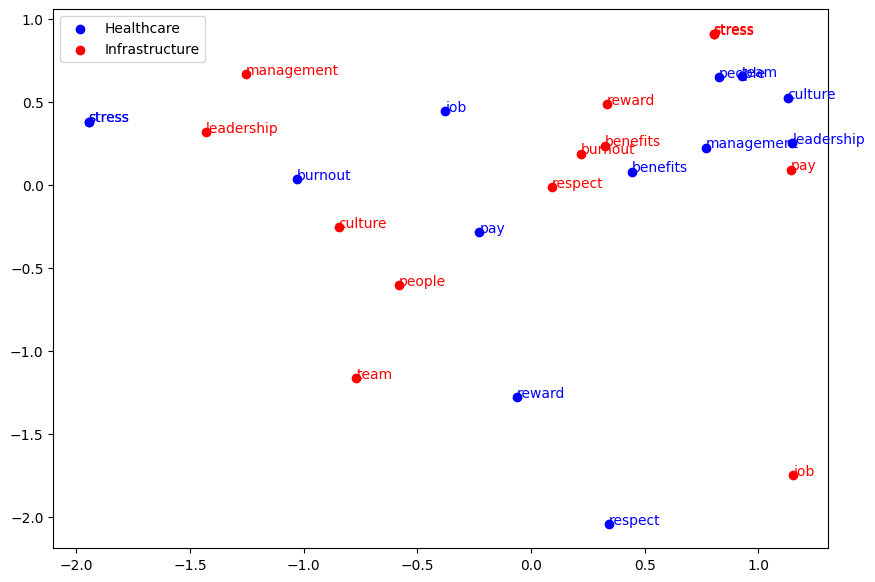

In [17]:
# visualize
keywords = ["pay", "management", "stress", "benefits", "team", "culture", "leadership", "job", "people", "burnout", "reward", "stress", "respect"]

# reduce to 2D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

vecs_h = np.array([w2v_health.wv[w] for w in keywords])
vecs_i = np.array([w2v_infra.wv[w] for w in keywords])

pca = PCA(2)
coords_h = pca.fit_transform(vecs_h)
coords_i = pca.fit_transform(vecs_i)

plt.figure(figsize=(10,7))
plt.scatter(coords_h[:,0], coords_h[:,1], color="blue", label="Healthcare")
plt.scatter(coords_i[:,0], coords_i[:,1], color="red", label="Infrastructure")
for i, w in enumerate(keywords):
    plt.text(coords_h[i,0], coords_h[i,1], w, color="blue")
    plt.text(coords_i[i,0], coords_i[i,1], w, color="red")
plt.legend()
plt.show()